In [3]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import urllib.request
from bs4 import BeautifulSoup

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

plt.rcParams['figure.figsize']=[50,30]
plt.rcParams['font.size']=22
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24

# Change the PATH variable to the folder where the CSV file is stored.
PATH = '/Users/rafa/dv/INSEAD/abstracts'
FILENAME = 'data/papers_with_categories.csv'

In [12]:
df = pd.read_csv('data/papers.csv', header=None, names=['URL'])

In [14]:
def retrieve_abstract(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    abstract_section = soup.find("div", {"class": "abstractSection"})
    return abstract_section.p.get_text()

In [43]:
result = []

for i, url in enumerate(df["URL"]):
    print(f'({i}/{len(df["URL"])})Retrieving abstract for {url}...')
    
    response = requests.get(url)
    
    soup = BeautifulSoup(response.text, "html.parser")
    
    title = soup.find(class_="citation__title").get_text()
    authors = set([a.get_text() for a in soup.find_all("a", {"class": "entryAuthor"})])
    date_of_publication = pd.to_datetime(soup.find(class_="epub-section__date").get_text())
    
    keywords = [kw.get_text() for kw in soup.find(class_="article__keyword").find_all("a")]
    
    if soup.find(class_="temis-related__list") is not None:
        total_number_of_related_papers = len(soup.find(class_="temis-related__list").find_all("li"))
    
    result.append([url, title, authors, date_of_publication, keywords, total_number_of_related_papers])

pd.DataFrame(result, columns=["URL", "Title", "Authors", "Date of Publication", "Keywords", "Total Number of Related Papers"])

(0/98)Retrieving abstract for https://doi.org/10.1287/msom.2018.0719...
(1/98)Retrieving abstract for https://doi.org/10.1287/msom.2018.0721...
(2/98)Retrieving abstract for https://doi.org/10.1287/msom.2018.0724...
(3/98)Retrieving abstract for https://doi.org/10.1287/msom.2018.0728...
(4/98)Retrieving abstract for https://doi.org/10.1287/msom.2017.0701...
(5/98)Retrieving abstract for https://doi.org/10.1287/msom.2018.0707...
(6/98)Retrieving abstract for https://doi.org/10.1287/msom.2018.0708...
(7/98)Retrieving abstract for https://doi.org/10.1287/msom.2017.0673...
(8/98)Retrieving abstract for https://doi.org/10.1287/msom.2017.0704...
(9/98)Retrieving abstract for https://doi.org/10.1287/msom.2017.0685...
(10/98)Retrieving abstract for https://doi.org/10.1287/msom.2017.0682...
(11/98)Retrieving abstract for https://doi.org/10.1287/msom.2017.0654...
(12/98)Retrieving abstract for https://doi.org/10.1287/msom.2017.0651...
(13/98)Retrieving abstract for https://doi.org/10.1287/msom.2

,URL,Title,Authors,Date of Publication,Keywords,Total Number of Related Papers
0,https://doi.org/10.1287/msom.2018.0719,Patient Prioritization in Emergency Department...,"{Mahesh Nagarajan, Yichuan Ding, Eric Park, Er...",2019-04-08,"[empirical research, emergency department, dyn...",4
1,https://doi.org/10.1287/msom.2018.0721,Measuring and Exploiting the Impact of Exhibit...,"{Victor Martínez-de-Albéniz, Ana Valdivia}",2018-12-06,"[art, cultural content, consumer engagement, c...",2
2,https://doi.org/10.1287/msom.2018.0724,Effects of Rescheduling on Patient No-Show Beh...,"{Jiayi Liu, Kum Khiong Yang, Zhichao Zheng, Ji...",2019-02-18,"[appointment scheduling, rescheduling, no-show...",1
3,https://doi.org/10.1287/msom.2018.0728,To Wait or Not to Wait: The Theory and Practic...,"{Kaan Kuzu, Susan H. Xu, Long Gao}",2019-04-25,"[customer behaviors, service systems, ticket q...",8
4,https://doi.org/10.1287/msom.2017.0701,Modeling Newsvendor Behavior: A Prospect Theor...,"{Bhavani Shanker Uppari, Sameer Hasija}",2018-07-20,"[newsvendor problem, prospect theory, referenc...",7
5,https://doi.org/10.1287/msom.2018.0707,Coordinating Supply and Demand on an On-Demand...,"{Kut C. So, Hai Wang, Jiaru Bai, Christopher S...",2018-06-28,"[on-demand services, endogenous supply and dem...",68
6,https://doi.org/10.1287/msom.2018.0708,Heterogeneity of Reference Effects in the Comp...,"{Samuel Nathan Kirshner, Anton Ovchinnikov}",2018-06-29,"[behavioral operations, competitive newsvendor...",8
7,https://doi.org/10.1287/msom.2017.0673,Selling Off-Grid Light to Liquidity-Constraine...,"{Serguei Netessine, Bhavani Shanker Uppari, Io...",2018-03-27,"[bottom of the pyramid, poverty, energy, keros...",17
8,https://doi.org/10.1287/msom.2017.0704,Fluid Teams and Knowledge Retrieval: Scaling S...,"{Amy C. Edmondson, Tom Fangyun Tan, Bradley R....",2018-06-22,"[knowledge repository, knowledge management, s...",17
9,https://doi.org/10.1287/msom.2017.0685,Supply Chain Visibility and Social Responsibil...,"{Yanchong Zheng, León Valdés, Tim Kraft}",2018-06-01,"[supply chain visibility, social responsibilit...",29


In [142]:
new_df =  pd.DataFrame(result, columns=["URL", "Title", "Authors", "Date of Publication", "Keywords", "Total Number of Related Papers"])
new_df.to_csv('solutions.csv')

In [143]:
new_df

,URL,Title,Authors,Date of Publication,Keywords,Total Number of Related Papers
0,https://doi.org/10.1287/msom.2018.0719,Patient Prioritization in Emergency Department...,"{Mahesh Nagarajan, Yichuan Ding, Eric Park, Er...",2019-04-08,"[empirical research, emergency department, dyn...",4
1,https://doi.org/10.1287/msom.2018.0721,Measuring and Exploiting the Impact of Exhibit...,"{Victor Martínez-de-Albéniz, Ana Valdivia}",2018-12-06,"[art, cultural content, consumer engagement, c...",2
2,https://doi.org/10.1287/msom.2018.0724,Effects of Rescheduling on Patient No-Show Beh...,"{Jiayi Liu, Kum Khiong Yang, Zhichao Zheng, Ji...",2019-02-18,"[appointment scheduling, rescheduling, no-show...",1
3,https://doi.org/10.1287/msom.2018.0728,To Wait or Not to Wait: The Theory and Practic...,"{Kaan Kuzu, Susan H. Xu, Long Gao}",2019-04-25,"[customer behaviors, service systems, ticket q...",8
4,https://doi.org/10.1287/msom.2017.0701,Modeling Newsvendor Behavior: A Prospect Theor...,"{Bhavani Shanker Uppari, Sameer Hasija}",2018-07-20,"[newsvendor problem, prospect theory, referenc...",7
5,https://doi.org/10.1287/msom.2018.0707,Coordinating Supply and Demand on an On-Demand...,"{Kut C. So, Hai Wang, Jiaru Bai, Christopher S...",2018-06-28,"[on-demand services, endogenous supply and dem...",68
6,https://doi.org/10.1287/msom.2018.0708,Heterogeneity of Reference Effects in the Comp...,"{Samuel Nathan Kirshner, Anton Ovchinnikov}",2018-06-29,"[behavioral operations, competitive newsvendor...",8
7,https://doi.org/10.1287/msom.2017.0673,Selling Off-Grid Light to Liquidity-Constraine...,"{Serguei Netessine, Bhavani Shanker Uppari, Io...",2018-03-27,"[bottom of the pyramid, poverty, energy, keros...",17
8,https://doi.org/10.1287/msom.2017.0704,Fluid Teams and Knowledge Retrieval: Scaling S...,"{Amy C. Edmondson, Tom Fangyun Tan, Bradley R....",2018-06-22,"[knowledge repository, knowledge management, s...",17
9,https://doi.org/10.1287/msom.2017.0685,Supply Chain Visibility and Social Responsibil...,"{Yanchong Zheng, León Valdés, Tim Kraft}",2018-06-01,"[supply chain visibility, social responsibilit...",29


## Question 1

In [96]:
since_2010 = new_df[new_df['Date of Publication'].dt.year >= 2010]

In [106]:
since_2010.loc[since_2010["Total Number of Related Papers"].idxmax()]["Title"]

'Pricing Multiple Products with the Multinomial Logit and Nested Logit Models: Concavity and Implications'

In [105]:
since_2010["Total Number of Related Papers"] == 174]

,URL,Title,Authors,Date of Publication,Keywords,Total Number of Related Papers
51,https://doi.org/10.1287/msom.1110.0344,Pricing Multiple Products with the Multinomial...,"{Hongmin Li, Woonghee Tim Huh}",2011-08-09,"[multinomial logit model, nested logit model, ...",174


## Question 2

In [137]:
memo = {}

for i, kwds in enumerate(new_df['Keywords']):
    for kw in kwds:
        memo[kw] = memo.get(kw, 0) + 1

max(memo, key=memo.get)

'pricing'

## Question 3

In [189]:
new_df['Total Number of Related Papers'].corr(new_df['Authors'].apply(len))

-0.16514543135583695

In [177]:
grouped = new_df['Total Number of Related Papers'].groupby(new_df['Authors'].apply(len))

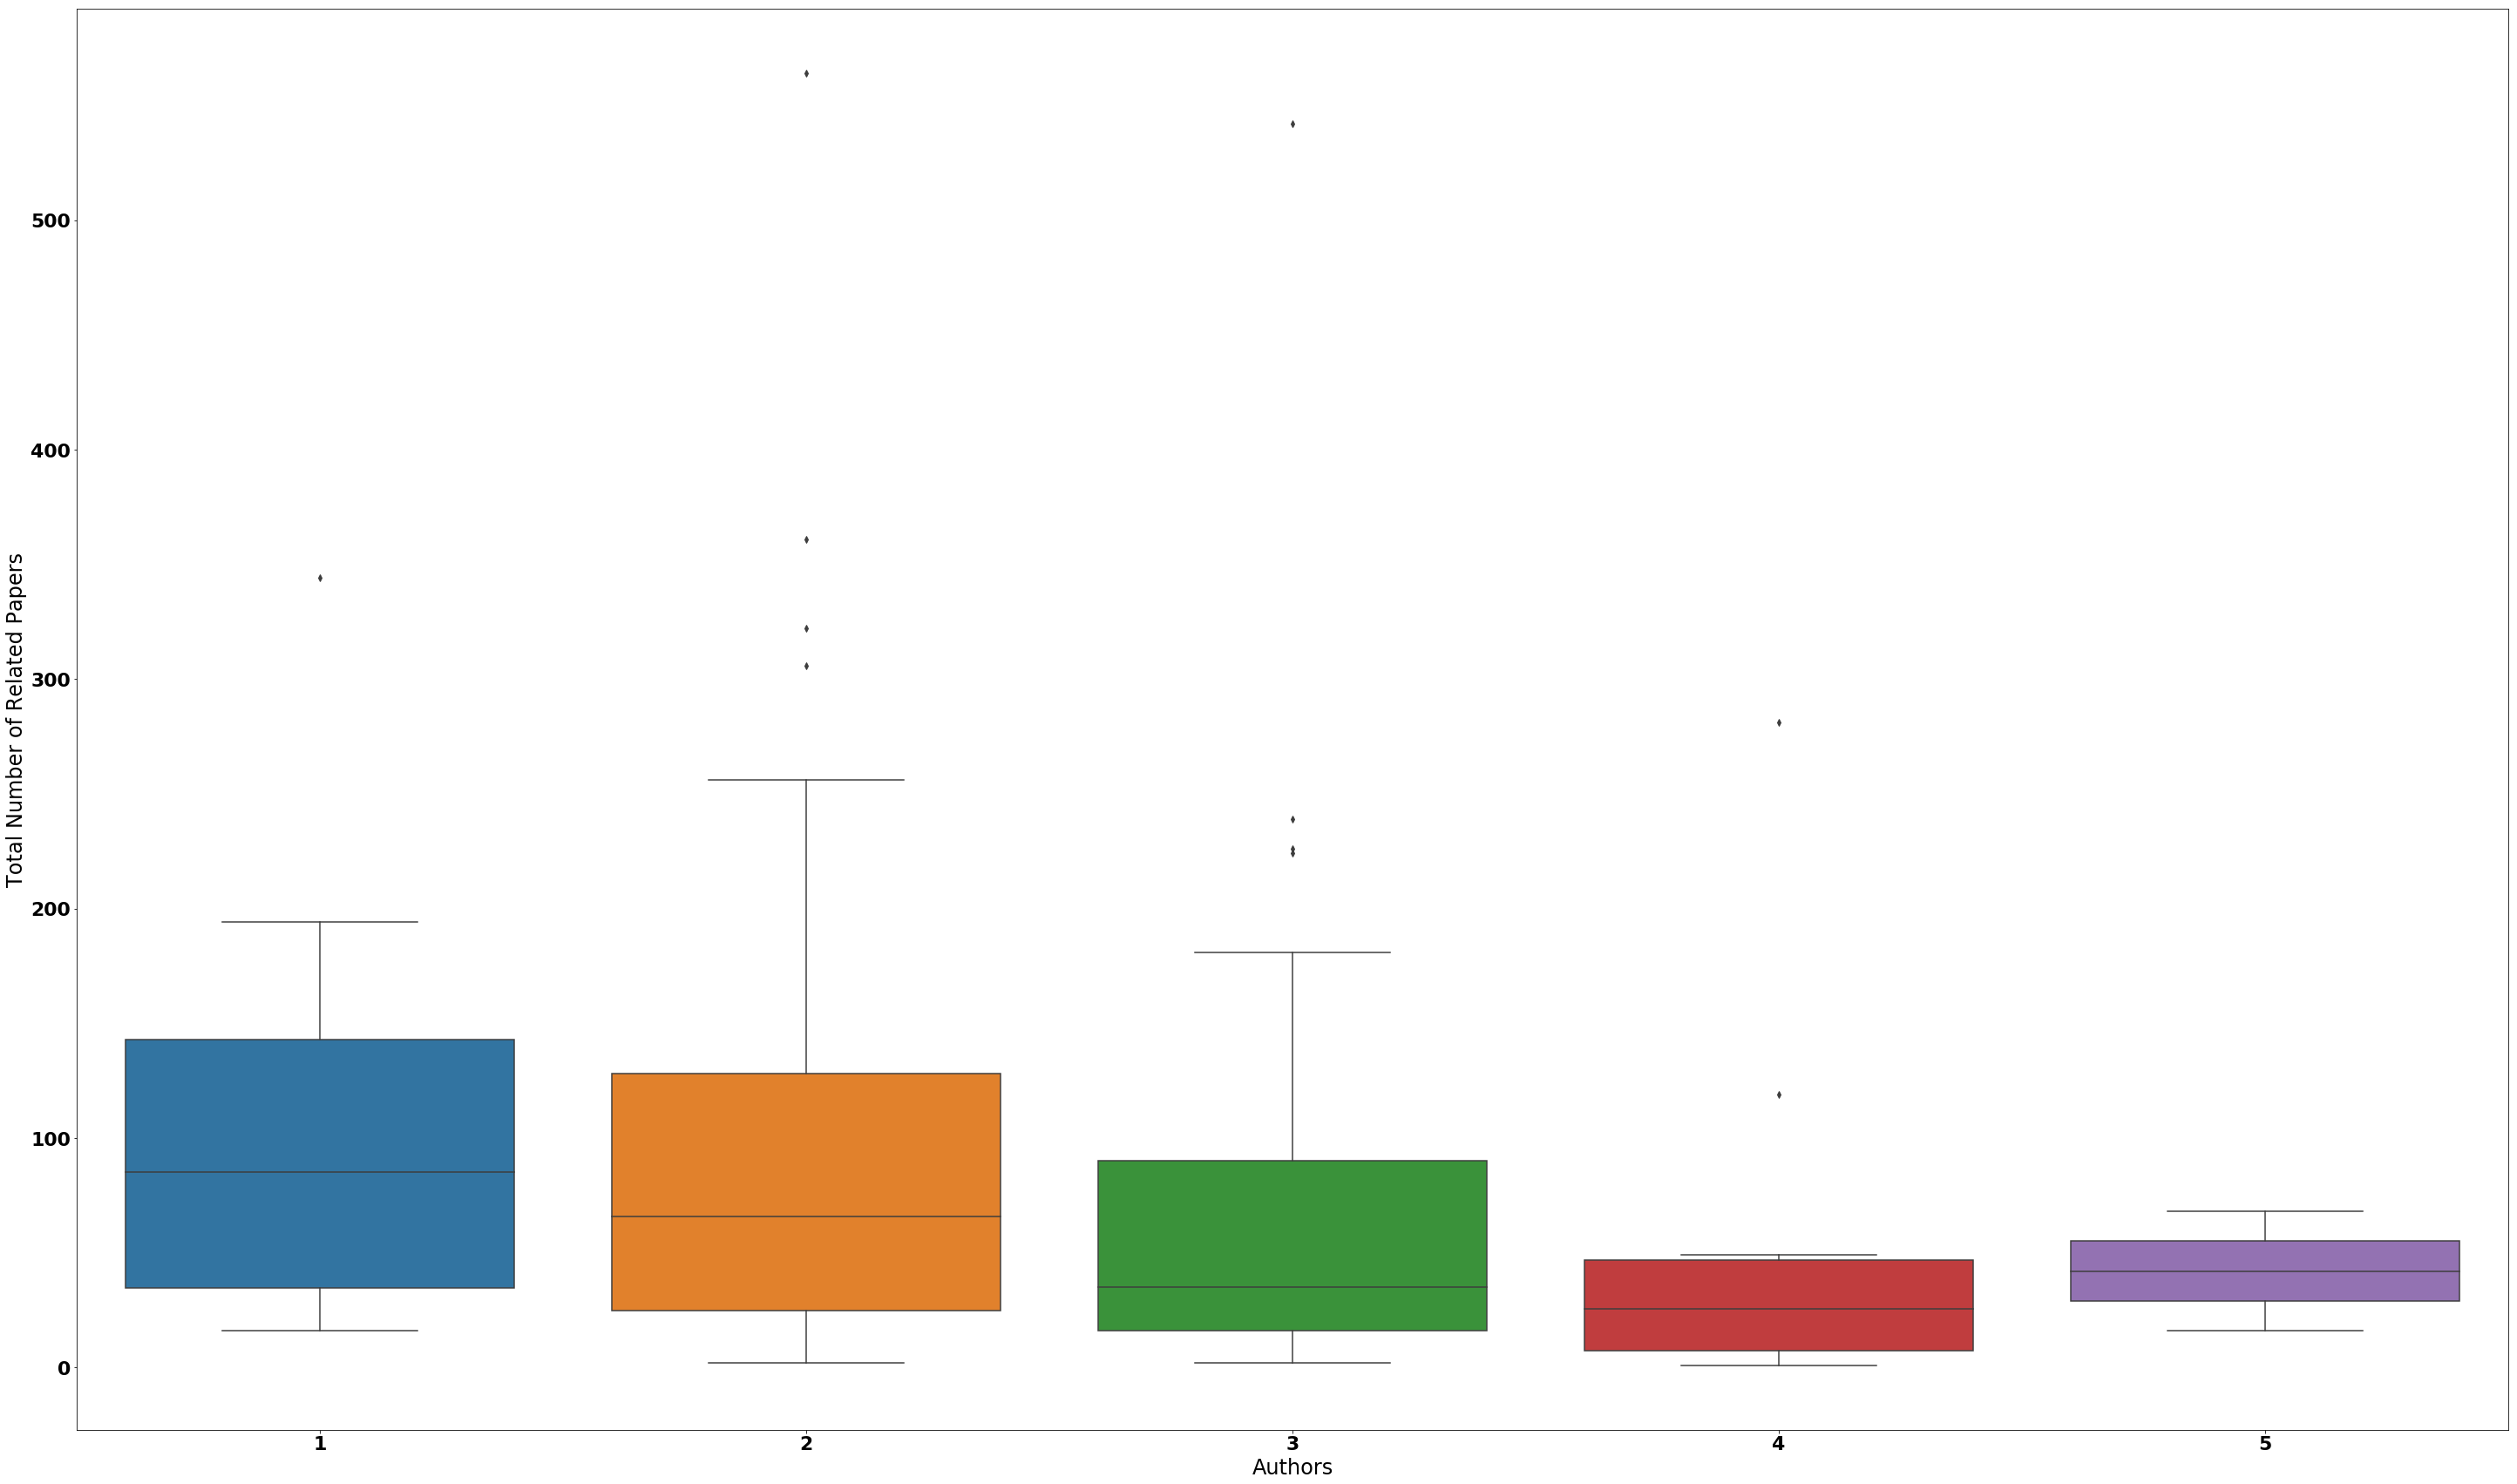

In [188]:
sns.boxplot(y=new_df['Total Number of Related Papers'], x=new_df['Authors'].apply(len))

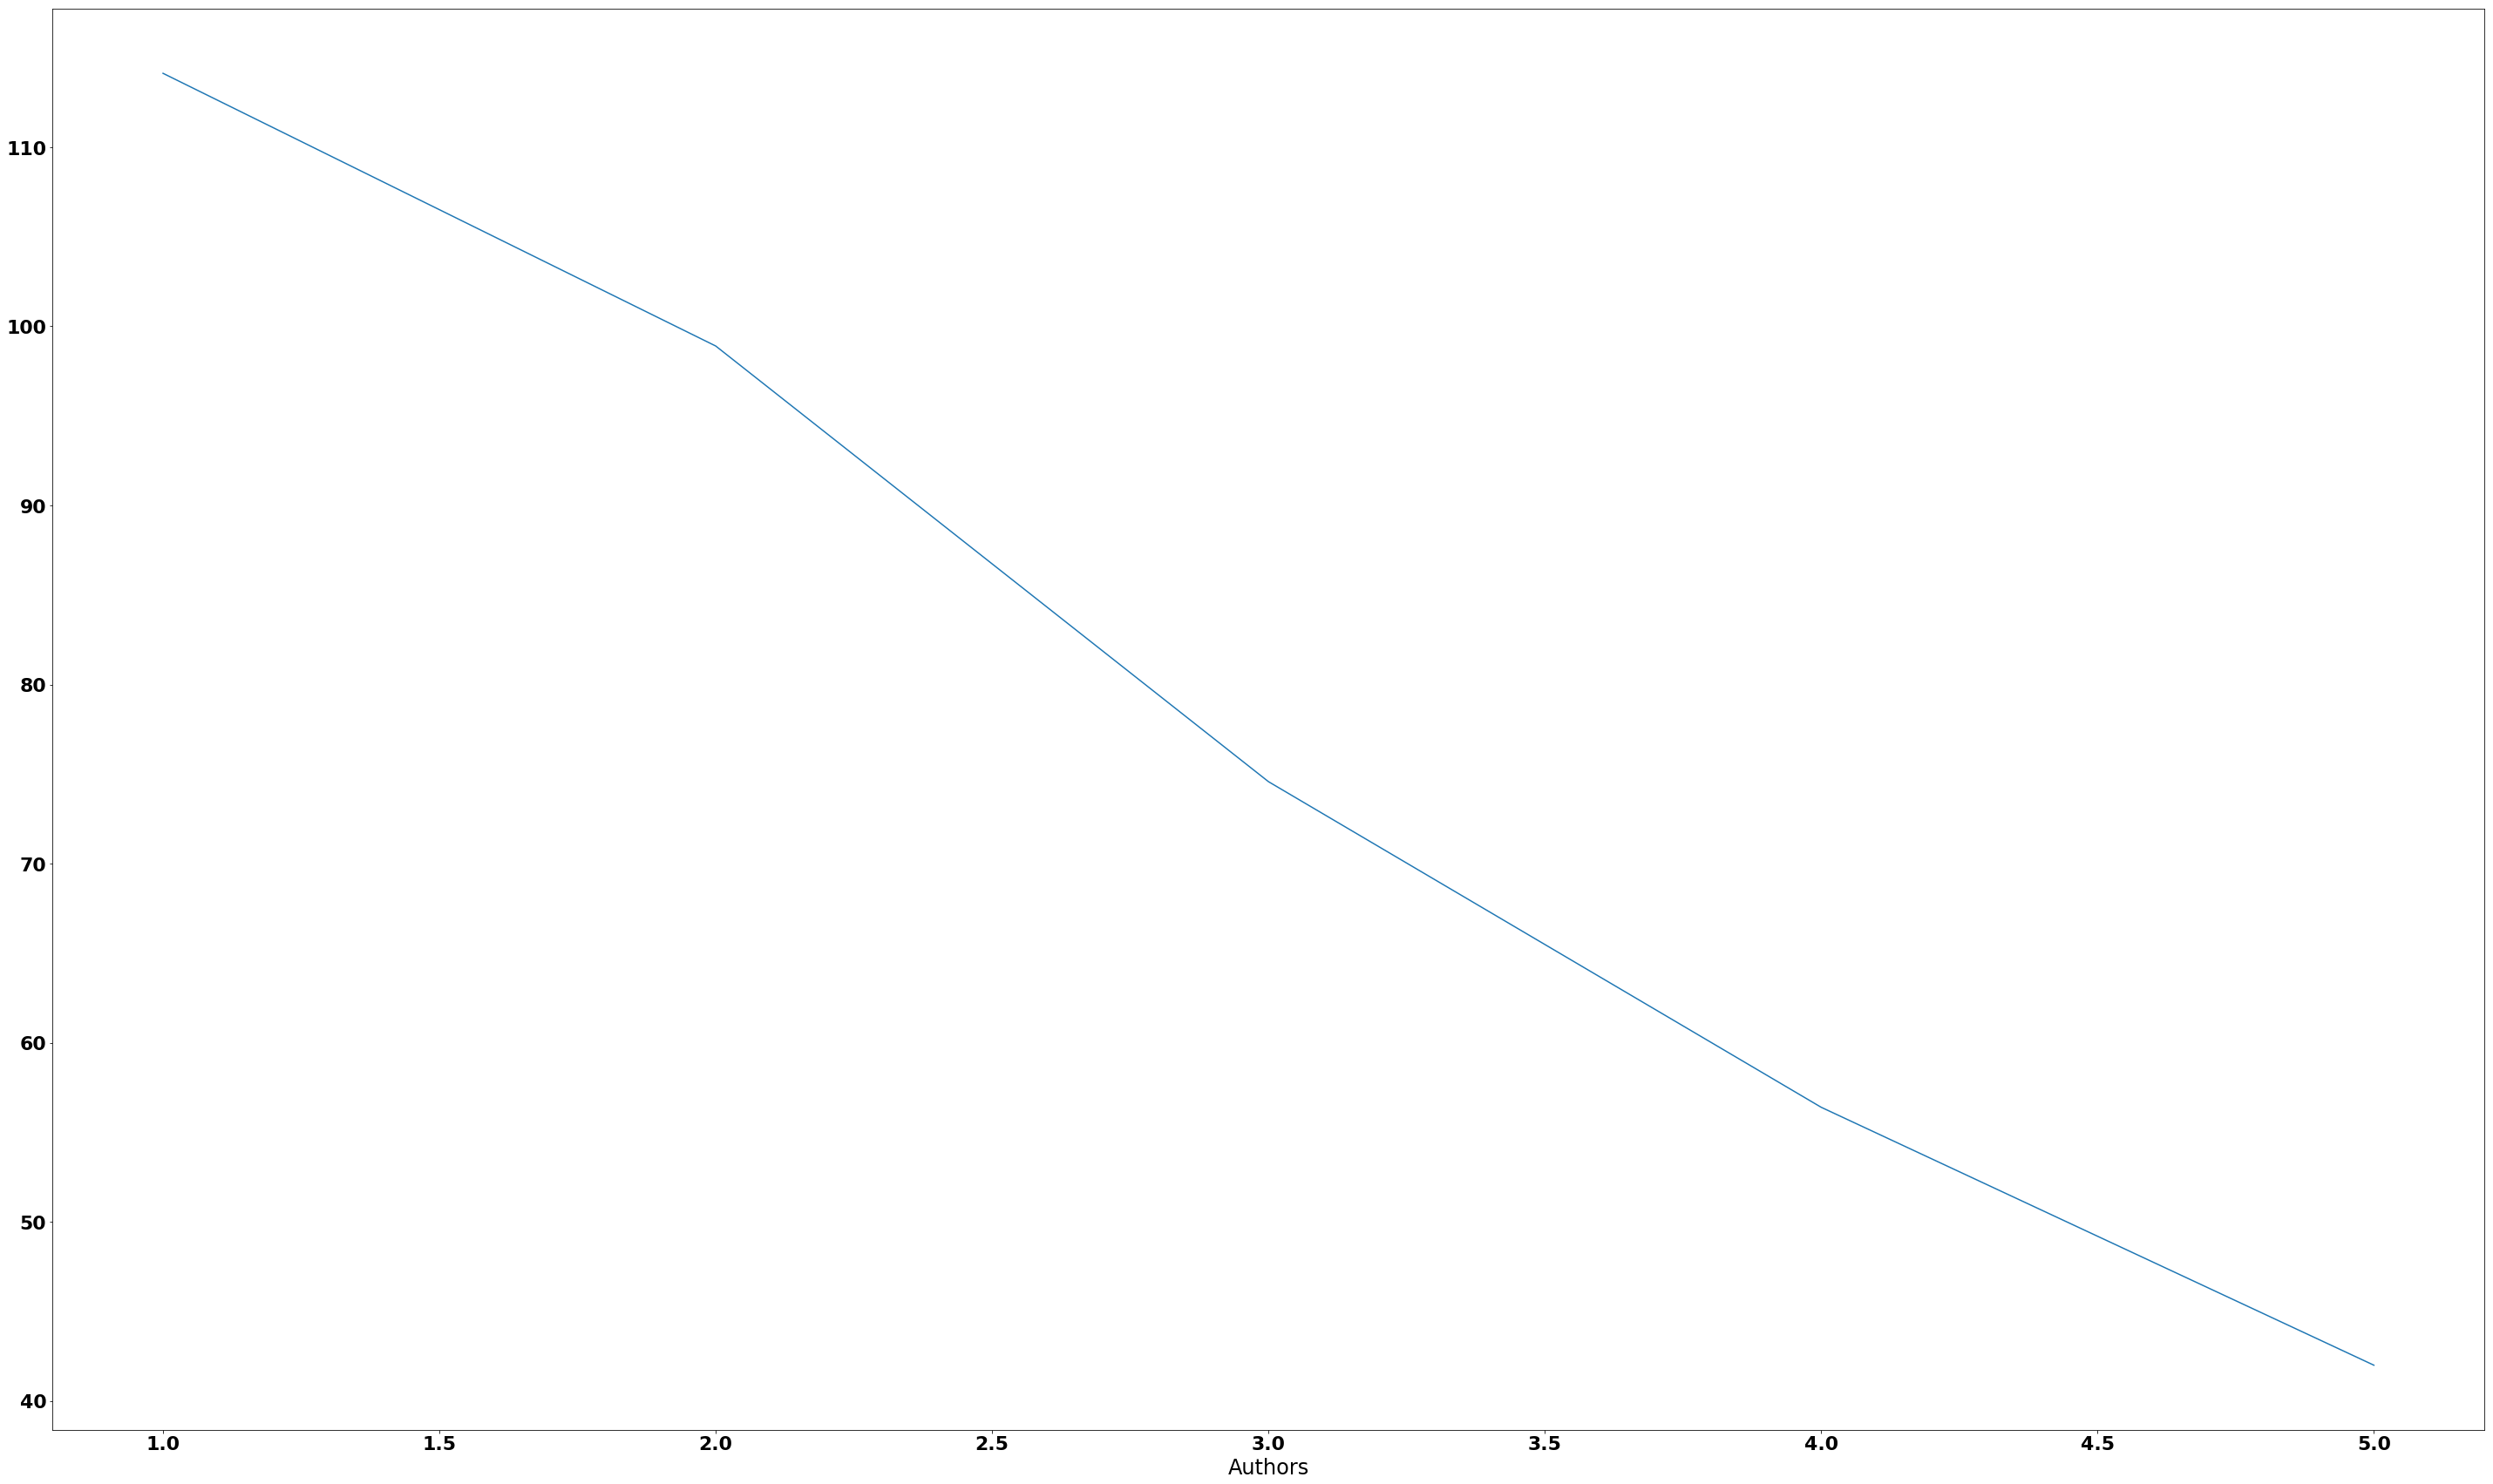

In [182]:
grouped.mean().plot()

In [165]:
year_average_related = new_df['Total Number of Related Papers'].groupby(new_df['Date of Publication'].dt.year).mean().to_dict()

In [167]:
new_df['Total Number of Related Papers'] / new_df['Date of Publication'].dt.year.apply(year_average_related.get)

0     0.923077
1     0.128342
2     0.230769
3     1.846154
4     0.449198
5     4.363636
6     0.513369
7     1.090909
8     1.090909
9     1.860963
10    0.192513
11    0.577540
12    0.128342
13    1.026738
14    0.577540
15    1.103448
16    0.068966
17    2.965517
18    0.551724
19    0.758621
20    0.551724
21    1.534884
22    0.418605
23    1.046512
24    0.639130
25    1.247826
26    0.578261
27    0.821739
28    0.395652
29    2.556522
        ...   
68    0.392891
69    0.293109
70    0.205800
71    1.490490
72    2.008107
73    3.517306
74    0.424072
75    0.567509
76    1.908326
77    1.596508
78    0.168382
79    0.511381
80    2.033722
81    0.290532
82    1.143969
83    0.581064
84    0.998703
85    0.690013
86    1.261997
87    1.000000
88    1.000000
89    1.000000
90    1.000000
91    1.915194
92    0.084806
93    1.000000
94    2.065808
95    0.143062
96    1.024320
97    0.766810
Length: 98, dtype: float64